In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv('../Dataset/Mall_Customers.csv')
df.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [34]:
df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True)

In [35]:
# Rows
df.shape[0]

200

In [36]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [37]:
df.isna().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [38]:
df.dtypes

CustomerID         int64
Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

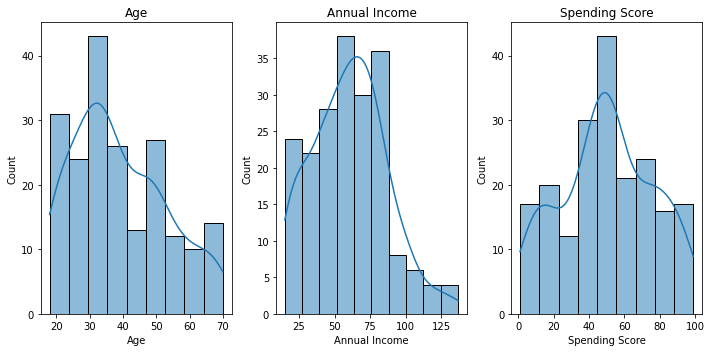

In [39]:
plt.figure(figsize=(10, 5))

columns = ['Age', 'Annual Income', 'Spending Score']
for i, column in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(x=df[column], kde=True)
    plt.title(column)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

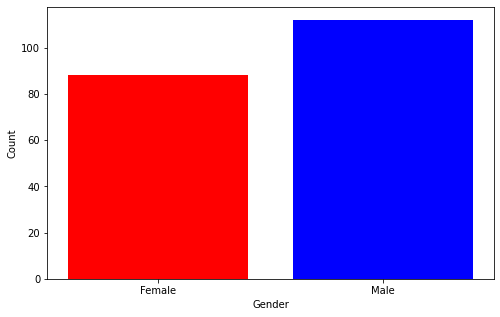

In [51]:
femaleCounts = df.Gender.value_counts()[0]
maleCounts = df.Gender.value_counts()[1]

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(['Female', 'Male'], [femaleCounts, maleCounts], color=['red', 'blue'])
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

plt.show()

**Preprocessing**

In [41]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df.Gender.replace({'Male':0, 'Female':1}, inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

**K-Means**

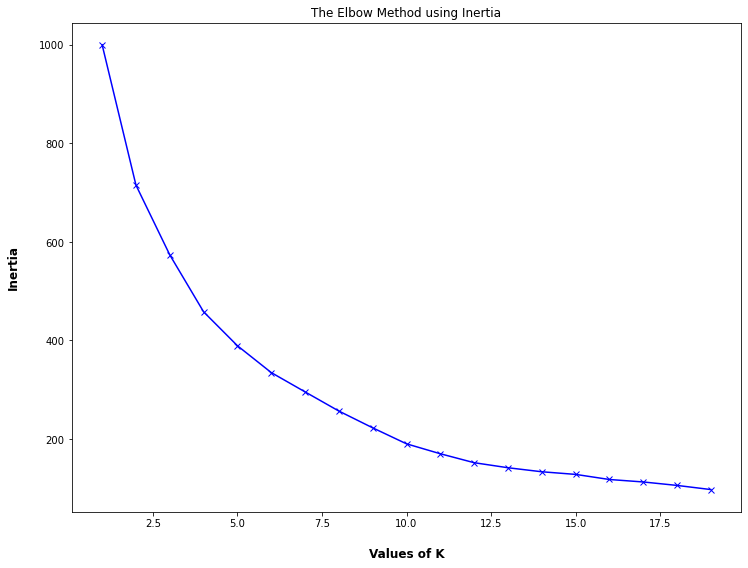

In [43]:
# ELBOW CRITERION
inertias = []
K = range(1, 20)
  
for k in K:
    #Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_scaled)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)

plt.subplots(figsize=(12, 9))
plt.plot(K, inertias, 'bx-')
plt.xlabel('\nValues of K', fontsize=12, fontweight='bold')
plt.ylabel('Inertia\n', fontsize=12, fontweight='bold')
plt.title('The Elbow Method using Inertia')
plt.show()

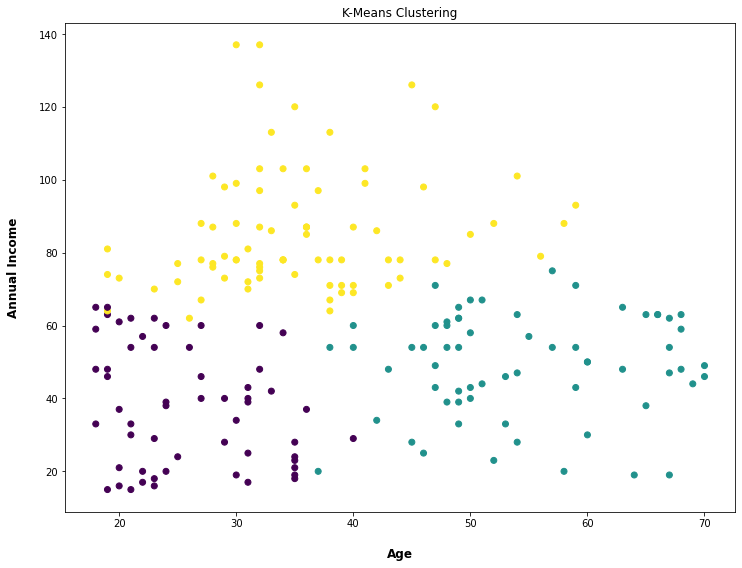

In [44]:
kmeans=KMeans(init="k-means++",n_clusters=3,random_state=15)
nsp_pred=kmeans.fit_predict(df_scaled)

plt.subplots(figsize=(12, 9))
plt.scatter(df.Age, df['Annual Income'], c=nsp_pred)
plt.title('K-Means Clustering')
plt.xlabel('\nAge', fontsize=12, fontweight='bold')
plt.ylabel('Annual Income\n', fontsize=12, fontweight='bold')
plt.show()

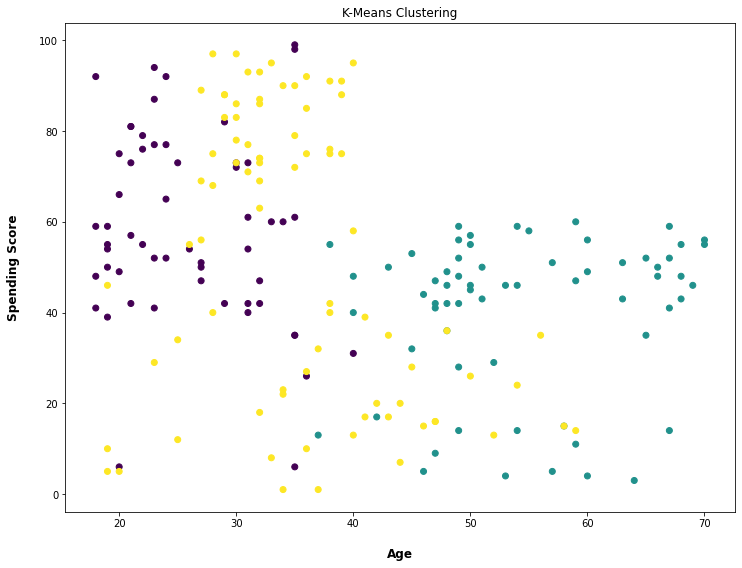

In [45]:
plt.subplots(figsize=(12, 9))
plt.scatter(df.Age, df['Spending Score'], c=nsp_pred)
plt.title('K-Means Clustering')
plt.xlabel('\nAge', fontsize=12, fontweight='bold')
plt.ylabel('Spending Score\n', fontsize=12, fontweight='bold')
plt.show()

In [46]:
df["Cluster"] = kmeans.fit_predict(df_scaled)
df.Cluster.value_counts()

2    80
1    64
0    56
Name: Cluster, dtype: int64

In [47]:
df.groupby(['Cluster'])['Age', 'Annual Income', 'Spending Score'].mean().round(2)

,Age,Annual Income,Spending Score
Cluster,,,
0,25.91,37.80,58.71
1,54.44,49.03,40.14
2,35.44,85.71,52.29


In [48]:
df.groupby(['Cluster'])['Age', 'Annual Income', 'Spending Score'].median().round(2)

,Age,Annual Income,Spending Score
Cluster,,,
0,24.0,37.5,56.0
1,52.5,50.0,46.0
2,34.0,78.5,57.0


In [49]:
df.groupby(['Cluster'])['Age'].min(), df.groupby(['Cluster'])['Age'].max()

(Cluster
 0    18
 1    37
 2    19
 Name: Age, dtype: int64,
 Cluster
 0    40
 1    70
 2    59
 Name: Age, dtype: int64)

**Vusualize Clusters with Seaborn**

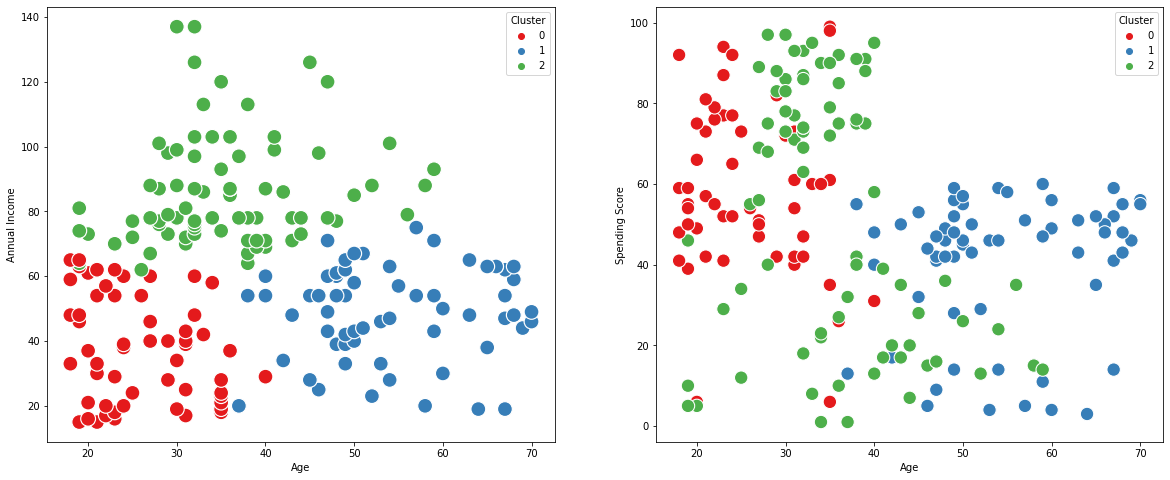

In [50]:
fig , axs = plt.subplots(1, 2, figsize=(20,8))

sns.scatterplot('Age', 'Annual Income', data=df, hue='Cluster', ax=axs[0], palette='Set1', s=220)
sns.scatterplot('Age', 'Spending Score', data=df, hue='Cluster', ax=axs[1], palette='Set1', s=180)

plt.show()

**Conclusion:**<br>
**Cluster 0 represents younger people or students who have less money each year. Even though they don't have a lot of money, these customers tend to spend more. It means that despite their limited income, they prioritize spending on different things like products and services.**<br><br>
**Cluster 1 includes older customers who have a medium income and spend less. This group shows a more careful spending behavior compared to Cluster 0. Even though they have more money than the younger group, these customers are cautious with their spending. They might save money or have specific preferences for certain products or services.**<br><br>
**Cluster 2 consists of middle-aged customers who have a higher income and spend moderately. This group probably has more money available to spend and is willing to buy various products and services. They might be at a point in their lives where they have more financial stability and feel comfortable spending on things they want, like goods and experiences.**